In [2]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.patches import Rectangle
import numpy as np

from buyLowFunctions import win_loss, get_team_schedule, fantasy_defense_rankings, calculate_top_player_matchup, plot_fantasy_vs_matchup, compositeBuyLowRankings,create_table_screenshot

In [3]:
week_by_week2024 = nfl.import_weekly_data([2024], downcast=True)
play_by_play2024 = nfl.import_pbp_data([2024], downcast=True, cache=False, alt_path=None)
schedule2024 = nfl.import_schedules([2024])
seasonal2024 = nfl.import_seasonal_data([2024], "REG")
winstotal2024 = nfl.import_win_totals([2024])

Downcasting floats.
2024 done.
Downcasting floats.


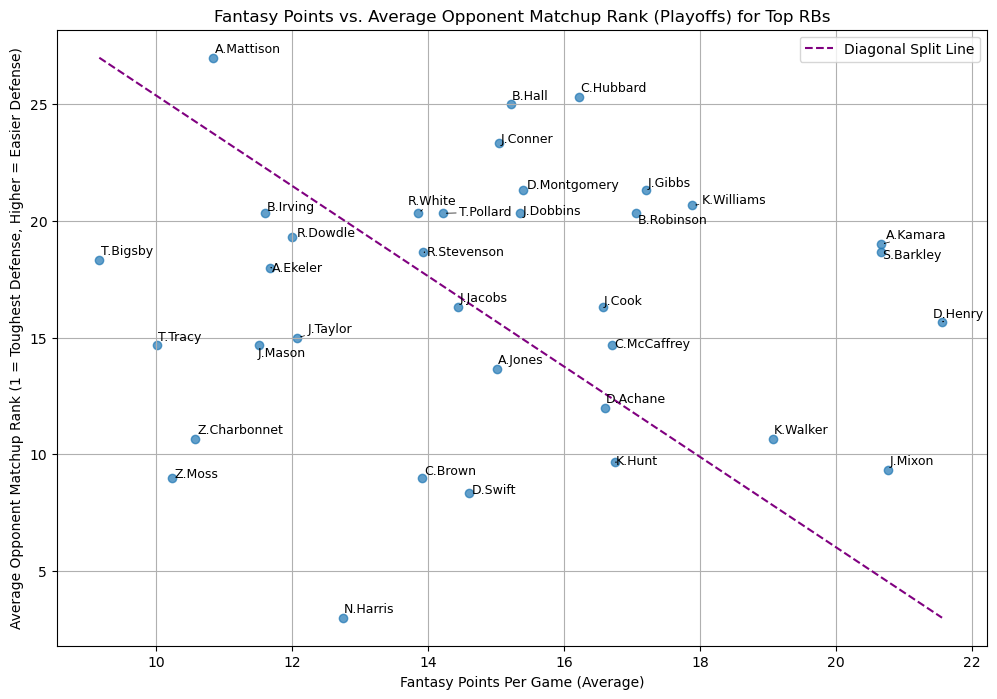

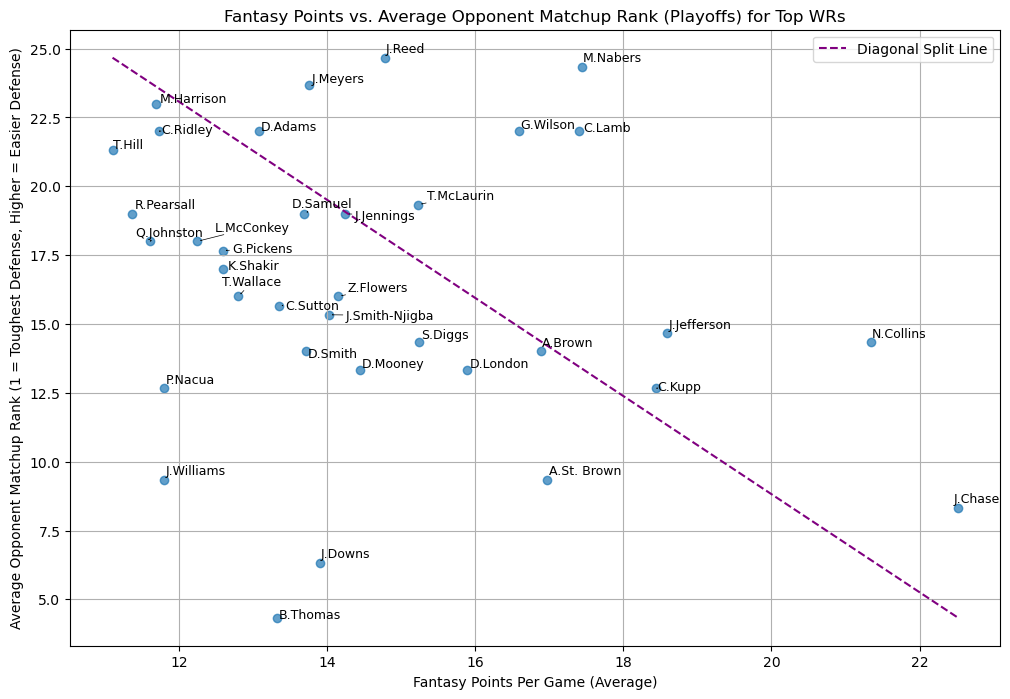

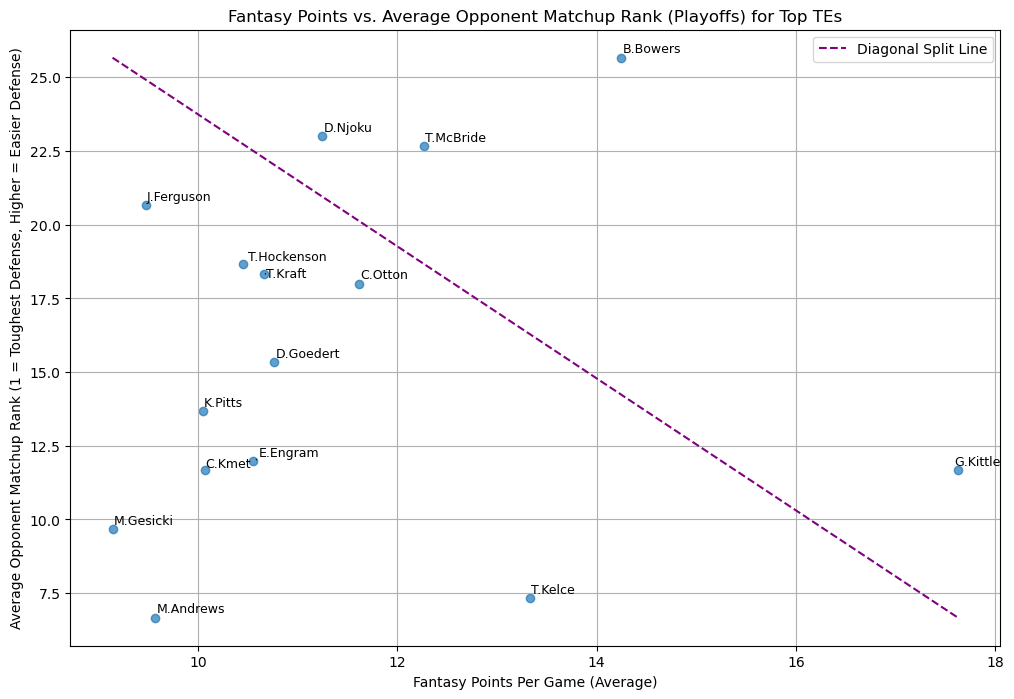

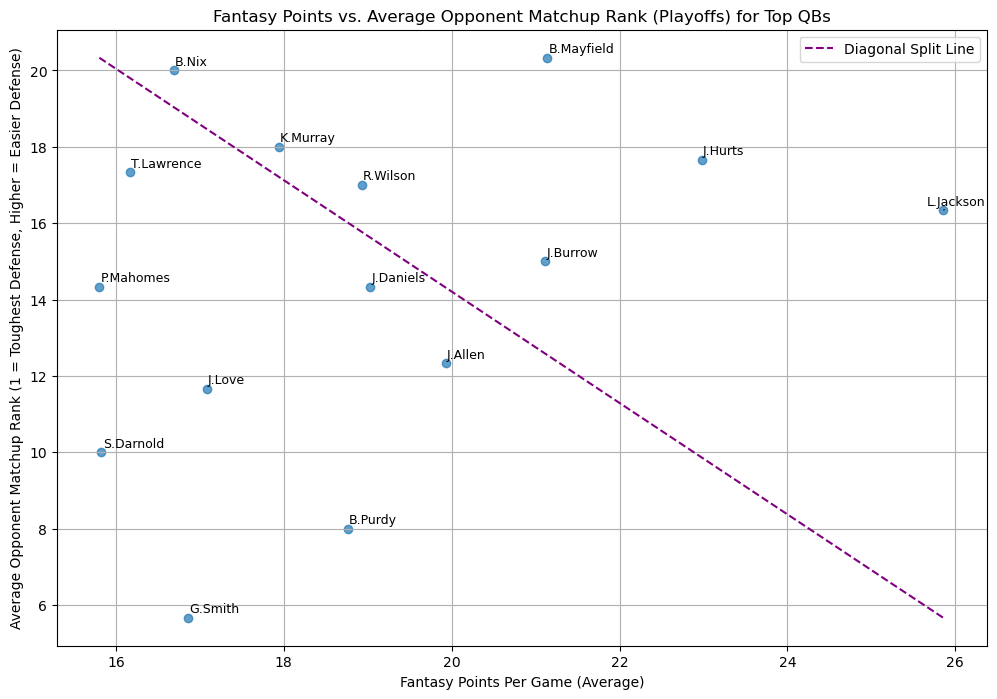

(35, 10)


In [3]:
top10_qb, top30_rb, top30_wr, top12_te = calculate_top_player_matchup(schedule2024, week_by_week2024, 15, 17)

plot_fantasy_vs_matchup(top30_rb, "RB", filepath = "fantasy_vs_matchup_rb_2024POFF.png")
plot_fantasy_vs_matchup(top30_wr, "WR", filepath = "fantasy_vs_matchup_wr_2024POFF.png")
plot_fantasy_vs_matchup(top12_te, "TE", filepath = "fantasy_vs_matchup_te_2024POFF.png")
plot_fantasy_vs_matchup(top10_qb, "QB", filepath = "fantasy_vs_matchup_qb_2024POFF.png")

print(top30_wr.shape)

In [4]:
topRB, topWR, topTE =compositeBuyLowRankings(week_by_week2024, schedule2024)

create_table_screenshot(topRB, "visuals/compositeScoreRB.png", 25)
create_table_screenshot(topWR, "visuals/compositeScoreWR.png", 25)
create_table_screenshot(topTE, "visuals/compositeScoreTE.png", 25)

topRBbyRank = topRB.sort_values(by='rank')
topWRbyRank = topWR.sort_values(by='rank')
topTEbyRank = topTE.sort_values(by='rank')

create_table_screenshot(topRBbyRank, "visuals/compositeScoreRBbyRank.png", 25)
create_table_screenshot(topWRbyRank, "visuals/compositeScoreWRbyRank.png", 25)
create_table_screenshot(topTEbyRank, "visuals/compositeScoreTEbyRank.png", 25)

c:\Users\ieyua\Documents\GitHub\nflanalytics\buyLowFunctions.py:332: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_rb_weekByWeek["total_touchdowns"] = top_rb_weekByWeek["rushing_tds"] + top_rb_weekByWeek["receiving_tds"]
